# **PRÁCTICA 3**

1) Leer y representar la imagen riceBGgradient.tif
2) Intenta separar los granos del fondo estableciendo un umbral
3) Como habrás visto, no es posible obtener un resultado satisfactorio debido a la inhomogeneidad en la iluminación. Utiliza una transformación morfológica top-hat para corregir la iluminación, tal y como se ha hecho en clase
4) Busca ahora un umbral. Para buscar el umbral, puedes ayudarte con la función “skimage.filters.threshold_otsu”

In [23]:
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import data, util, exposure, color

from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star,
                                binary_erosion, binary_dilation, binary_opening, binary_closing,
                               remove_small_holes, label, convex_hull_image, skeletonize, thin, reconstruction,
                               opening, closing, dilation, erosion)

from skimage import data
from skimage.util import invert

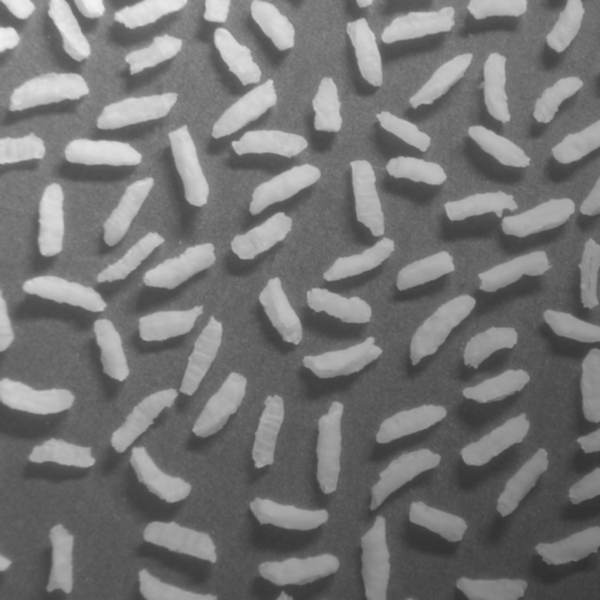

In [24]:
file = 'images/riceBGgradient.tif'

img_rice = Image.open(file)
display(img_rice)

formato: TIFF
(ancho, alto) = (600, 600)
modo:  L


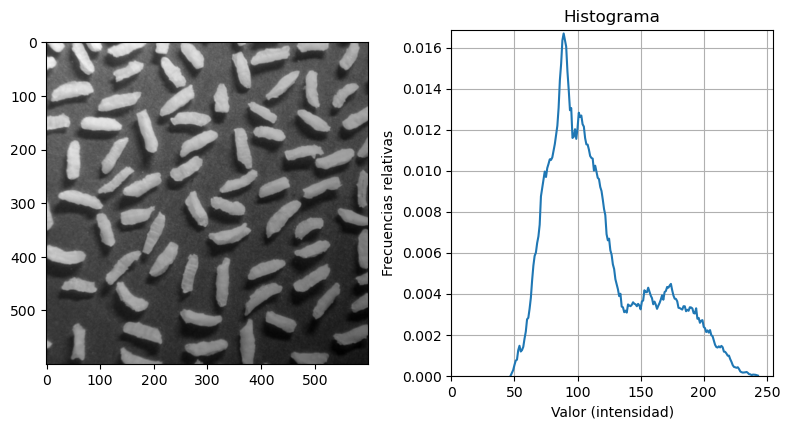

In [46]:
print('formato:', img_rice.format)
print('(ancho, alto) =', img_rice.size)
print('modo: ', img_rice.mode)

img_hist, bins = exposure.histogram(np_img_rice, normalize=True)

plt.figure(figsize=(8, 8))

plt.subplot(221)
plt.imshow(np_img_rice, cmap='gray')

plt.subplot(222)
plt.plot(bins, img_hist)
plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()

plt.tight_layout()

Nivel (L):  127.5 	Ventana (W):  145
Nivel de negro:  55 	Nivel de Blanco:  200
m =  1.7586206896551724 b =  -96.72413793103448
Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (600, 600)
Número de píxels:  360000
Imagen: 
Valor mínimo:  0 	Valor máximo:  255
Valor mediano:  107.26931388888889


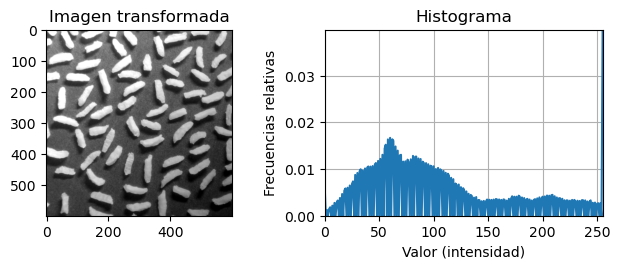

In [61]:
# Definición de la transformación

Mi = 255

Bl = 55
Wl = 200

L = (Bl + Wl)/2
W = Wl - Bl

#L = 128
#W = 256

#Bl = L - W/2
#Wl = L + W/2

m = Mi/W
b = -Mi*(L/W - 0.5)

print('Nivel (L): ', L, '\tVentana (W): ', W)
print('Nivel de negro: ', Bl, '\tNivel de Blanco: ', Wl)
print('m = ', m, 'b = ', b)


# Transformación

x = np.arange((min(Bl, 0)), max(Wl, Mi))
y = m*x +b

y_transf = y.copy()
y_transf[y_transf<0] = 0
y_transf[y_transf>Mi] = Mi


img_float = util.img_as_float(np_img_rice)*Mi

img_float = img_float*m + b
img_float[img_float<0]  = 0
img_float[img_float>Mi] = Mi

img_transf = util.img_as_ubyte(img_float/Mi)

print('Tipo de datos: ', img_transf.dtype)
print('Tamaño de imagen (filas, columnas): ', img_transf.shape)
print('Número de píxels: ', img_transf.size)
print('Imagen: \nValor mínimo: ', img_transf.min(), '\tValor máximo: ', img_transf.max())
print('Valor mediano: ', img_transf.mean())



img_hist, bins = exposure.histogram(img_transf, normalize=True)

plt.subplot(223)
plt.imshow(img_transf, cmap='gray')
plt.title('Imagen transformada')

plt.subplot(224)
plt.plot(bins, img_hist)
plt.axis([0,255, 0, img_hist.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()

plt.tight_layout()

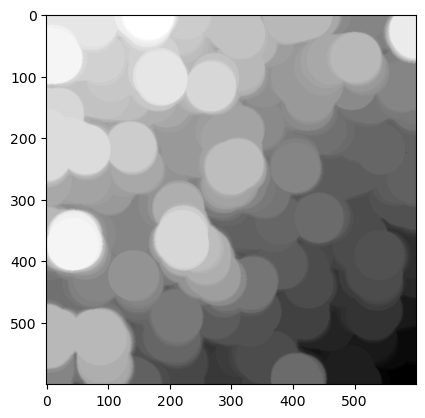

In [29]:
#Estimamos la variación de iluminación del fondo con una apertura
fondo = opening(img, disk(40))
plt.imshow(fondo, cmap='gray')

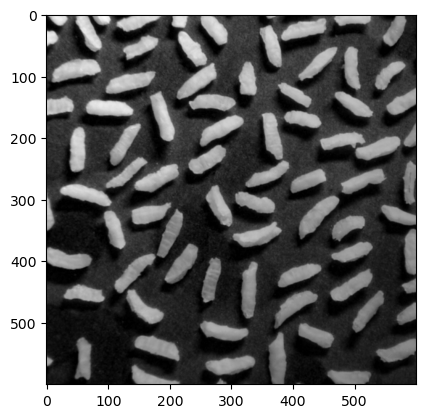

In [30]:
img_corregida=img-fondo
plt.imshow(img_corregida, cmap='gray')

In [31]:
umbral_otsu = filters.threshold_otsu(img_corregida)
umbralizado_otsu = img_corregida > umbral_otsu

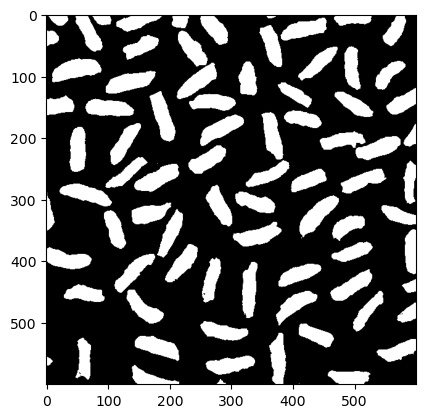

In [32]:
plt.imshow(umbralizado_otsu, cmap='gray')

Valor mínimo:  False 	Valor máximo:  True


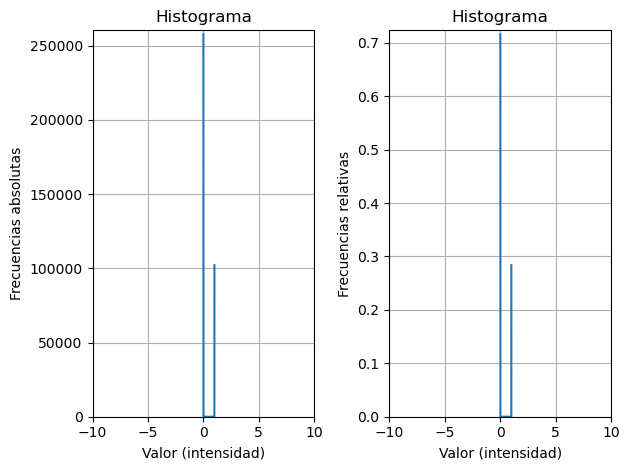

In [40]:
##Histograma separación

umbralizado_otsu = np.array(umbralizado_otsu)

hist_umb, bins = exposure.histogram(umbralizado_otsu, normalize=False)
plt.subplot(121)
plt.plot(bins, hist_umb)
plt.axis([-10, 10, 0, 1.01*hist_umb.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias absolutas')
plt.grid()


hist_umb, bins = exposure.histogram(umbralizado_otsu, normalize=True)

plt.subplot(122)
plt.plot(bins, hist_umb)
plt.axis([-10, 10, 0, 1.01*hist_umb.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()

plt.tight_layout()

print('Valor mínimo: ', umbralizado_otsu.min(), '\tValor máximo: ', umbralizado_otsu.max())